<a href="https://colab.research.google.com/github/chettkulkarni/deep_learning/blob/master/assignment%204/Keras_VGG16_Assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# VGG16 And CIFAR

In [0]:
import os
import datetime
import numpy as np
import pandas as pd
import keras
import tensorflow as tf
from keras import optimizers
from keras.layers import *
from keras.regularizers import l2
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard, Callback, LearningRateScheduler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt


Using TensorFlow backend.


In [0]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data()

169009152/169001437 [==============================] - 2s 0us/step


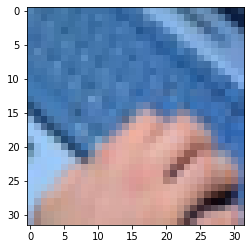

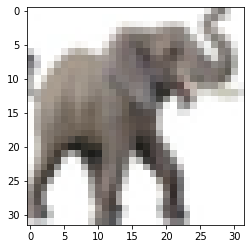

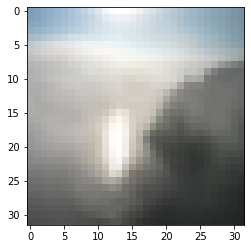

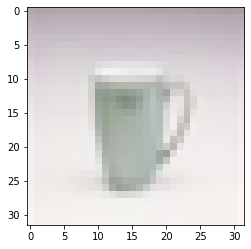

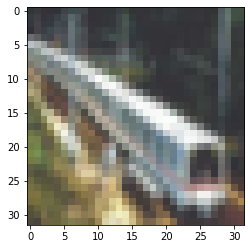

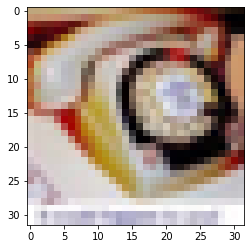

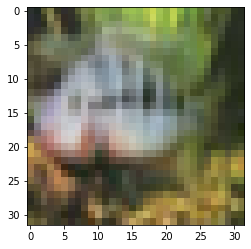

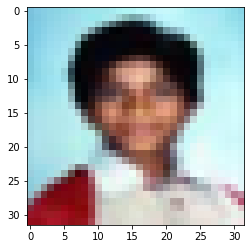

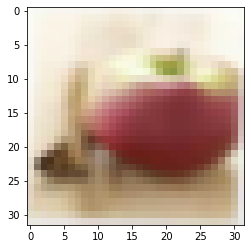

In [0]:
# Before preprocessing the dataset with VGG16 network, checking the data
for i in range(10,1,-1):
    img = x_train[i].reshape(32,32,3)
    plt.imshow(img)
    plt.show()

Normalize inputs for zero mean and unit variance

In [0]:
def normalize(x_train,x_test):
        mean = np.mean(x_train,axis=(0,1,2,3))
        std = np.std(x_train, axis=(0, 1, 2, 3))
        x_train = (x_train-mean)/(std+1e-7)
        x_test = (x_test-mean)/(std+1e-7)
        return x_train, x_test

In [0]:
x_train, x_test = normalize(x_train, x_test)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


target_classes = 100

y_train = to_categorical(y_train, target_classes)
y_test = to_categorical(y_test, target_classes)

In [0]:
def LearningRateSchedulerOptimser(epoch):
  return learning_rate * (0.5 ** (epoch // lr_drop))

reduce_lr = LearningRateScheduler(LearningRateSchedulerOptimser)

In [0]:
datagen = ImageDataGenerator()
datagen.fit(x_train)

In [0]:
weight_decay = 0.0005
input_shape = (32,32,3)
batch_size = 128
epochs = 100
learning_rate = 0.1
lr_decay = 1e-6
lr_drop = 20

In [0]:
class VGG16:
      def build(self):

          model = keras.models.Sequential()

          model.add(Conv2D(64, (3, 3), padding='same', input_shape=input_shape, kernel_regularizer=l2(weight_decay)))
          model.add(Activation('relu'))
          model.add(BatchNormalization())
          model.add(Dropout(0.3))

          model.add(Conv2D(64, (3, 3), padding='same', kernel_regularizer=l2(weight_decay)))
          model.add(Activation('relu'))
          model.add(BatchNormalization())

          model.add(MaxPooling2D(pool_size=(2, 2)))

          model.add(Conv2D(64, (3, 3), padding='same', kernel_regularizer=l2(weight_decay)))
          model.add(Activation('relu'))
          model.add(BatchNormalization())
          model.add(Dropout(0.4))

          model.add(Conv2D(64, (3, 3), padding='same', kernel_regularizer=l2(weight_decay)))
          model.add(Activation('relu'))
          model.add(BatchNormalization())
          model.add(BatchNormalization())

          model.add(MaxPooling2D(pool_size=(2, 2)))

          model.add(Conv2D(64, (3, 3), padding='same', kernel_regularizer=l2(weight_decay)))
          model.add(Activation('relu'))
          model.add(BatchNormalization())
          model.add(Dropout(0.4))

          model.add(Conv2D(64, (3, 3), padding='same', kernel_regularizer=l2(weight_decay)))
          model.add(Activation('relu'))
          model.add(BatchNormalization())
          model.add(Dropout(0.4))


          model.add(Conv2D(64, (3, 3), padding='same', kernel_regularizer=l2(weight_decay)))
          model.add(Activation('relu'))
          model.add(BatchNormalization())

          model.add(MaxPooling2D(pool_size=(2, 2)))

          model.add(Conv2D(64, (3, 3), padding='same', kernel_regularizer=l2(weight_decay)))
          model.add(Activation('relu'))
          model.add(BatchNormalization())
          model.add(Dropout(0.4))

          model.add(Conv2D(512, (3, 3), padding='same', kernel_regularizer=l2(weight_decay)))
          model.add(Activation('relu'))
          model.add(BatchNormalization())
          model.add(Dropout(0.4))

          model.add(Conv2D(512, (3, 3), padding='same', kernel_regularizer=l2(weight_decay)))
          model.add(Activation('relu'))
          model.add(BatchNormalization())

          model.add(MaxPooling2D(pool_size=(2, 2)))


          model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=l2(weight_decay)))
          model.add(Activation('relu'))
          model.add(BatchNormalization())
          model.add(Dropout(0.4))

          model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=l2(weight_decay)))
          model.add(Activation('relu'))
          model.add(BatchNormalization())
          model.add(Dropout(0.4))

          model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=l2(weight_decay)))
          model.add(Activation('relu'))
          model.add(BatchNormalization())

          model.add(MaxPooling2D(pool_size=(2, 2)))
          model.add(Dropout(0.5))

          model.add(Flatten())
          model.add(Dense(512,kernel_regularizer=l2(weight_decay)))
          model.add(Activation('relu'))
          model.add(BatchNormalization())

          model.add(Dropout(0.5))
          model.add(Dense(target_classes))
          model.add(Activation('softmax'))
          return model

Summary of the model

In [0]:
model=VGG16().build()

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 64)       

Visualize and export the model's summary image as a png file

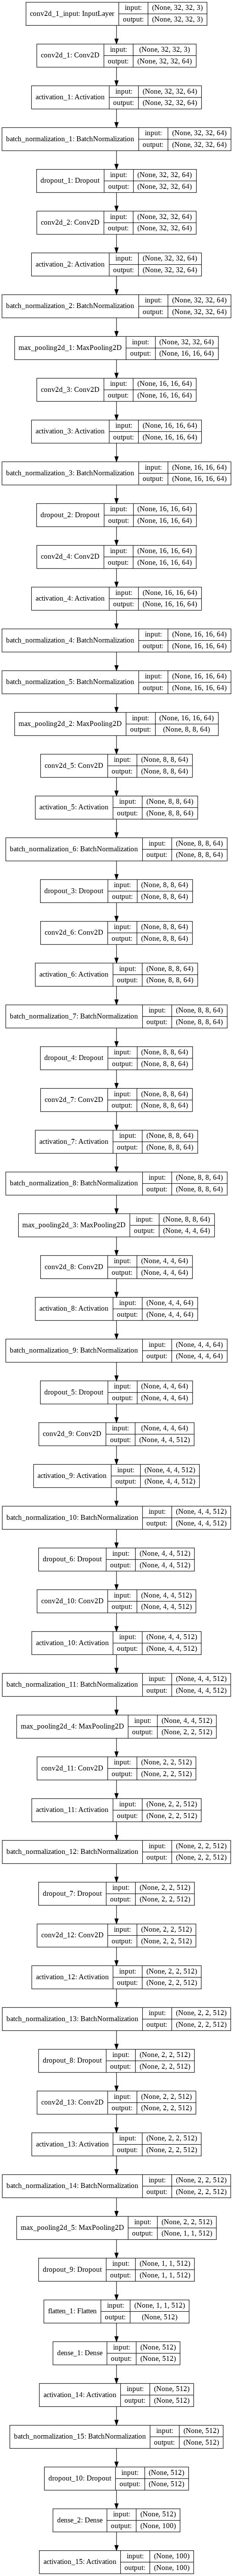

In [0]:
keras.utils.plot_model(model, "vgg16.png", show_shapes=True)

In [0]:
model.compile(loss='categorical_crossentropy', optimizer=optimizers.SGD(lr=learning_rate, decay=lr_decay, momentum=0.9, nesterov=True), metrics=['accuracy'])

In [0]:
early_stop = EarlyStopping(monitor='accuracy', patience=5, mode='max')
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
callbacks_list = [tensorboard_callback, reduce_lr]

In [0]:
history = model.fit_generator(datagen.flow(x_train, y_train,batch_size=batch_size),
                            steps_per_epoch=x_train.shape[0] // batch_size,
                            epochs=epochs,
                            validation_data=(x_test, y_test),callbacks=callbacks_list)

Epoch 1/100
390/390 [==============================] - 32s 82ms/step - loss: 13.7299 - accuracy: 0.0295 - val_loss: 10.6573 - val_accuracy: 0.0248
Epoch 2/100
390/390 [==============================] - 22s 56ms/step - loss: 8.4837 - accuracy: 0.0513 - val_loss: 7.3169 - val_accuracy: 0.0288
Epoch 3/100
390/390 [==============================] - 22s 56ms/step - loss: 6.1017 - accuracy: 0.0651 - val_loss: 5.7262 - val_accuracy: 0.0391
Epoch 4/100
390/390 [==============================] - 22s 55ms/step - loss: 4.9833 - accuracy: 0.0821 - val_loss: 4.8347 - val_accuracy: 0.0683
Epoch 5/100
390/390 [==============================] - 22s 56ms/step - loss: 4.4627 - accuracy: 0.0937 - val_loss: 4.5933 - val_accuracy: 0.0789
Epoch 6/100
390/390 [==============================] - 22s 55ms/step - loss: 4.1948 - accuracy: 0.1086 - val_loss: 4.1703 - val_accuracy: 0.1124
Epoch 7/100
390/390 [==============================] - 22s 56ms/step - loss: 4.0270 - accuracy: 0.1230 - val_loss: 4.1716 - val_

In [0]:
score = model.evaluate(x_test,y_test)
print("Test Loss: ",score[0])
print("Test Accuracy: ",score[1])

10000/10000 [==============================] - 4s 371us/step
Test Loss:  2.5406960456848147
Test Accuracy:  0.59170001745224
